In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install youtube-comment-downloader


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 8.5 MB/s eta 0:00:00


In [ ]:
pip install pytube

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.3 MB/s eta 0:00:00


In [ ]:
pip install --upgrade pytube

In [16]:
import re

# Read from the comment file
with open('/content/drive/MyDrive/CSE477/comments.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Regular expression to match numbered comments
pattern = r'\d+\.(.*?)(?=\n\d+\.|\Z)'  # Matches text starting with number and ending before next number

# Find all matches
comments = re.findall(pattern, text, re.DOTALL)

# Clean up each comment (strip leading/trailing spaces and newlines)
comments = [comment.strip() for comment in comments]

# Print or use the extracted comments
for i, comment in enumerate(comments, 1):
    print(f"{i}. {comment}")


1. Yesterday I click on a video called 'learning phyton for Beginners'. Today youtube's algorithm sent this video. I was so confuse but somehow listen to it and when I feel I understand something from this explanation, it makes me excited. A genius can make someone understand complicated things, I am very grateful.
2. No fancy words, just simple English and the right pace to explain concepts. Brilliant.
3. I've been trying to learn ML for quite awhile but could never really grasp the algorithim. She explains how the formula comes about and why is it used in the classification or regression so well. My god. Thumbs up for sensei Kylie and free code camp!!!
4. I have no idea how my YouTube algorithm brought me here while I was sleeping but it made for some strange dreams
5. For anyone getting an error related to converting a list to a float, the model.evaluate is actually returning a list.  She has the correction in the code at around 2:05:51, but she doesn't explicitly mention the correc

In [3]:
def load_raw_comments(filepath='/content/drive/MyDrive/CSE477/comments.txt'):
    comments = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            # Ignore empty lines, metadata
            if len(line) > 0 and not line.endswith('ago') and not line.lower() == 'reply':
                comments.append(line)
    return comments

raw_comments = load_raw_comments()
print(f"Loaded {len(raw_comments)} potential comment lines.")
print(raw_comments[:5])


Loaded 167 potential comment lines.
['https://www.youtube.com/watch?v=i_LwzRVP7bg&t=614s', 'Machine Learning for Everybody -full course', "1.Yesterday I click on a video called 'learning phyton for Beginners'. Today youtube's algorithm sent this video. I was so confuse but somehow listen to it and when I feel I understand something from this explanation, it makes me excited. A genius can make someone understand complicated things, I am very grateful.", '2. No fancy words, just simple English and the right pace to explain concepts. Brilliant.', "3.I've been trying to learn ML for quite awhile but could never really grasp the algorithim. She explains how the formula comes about and why is it used in the classification or regression so well. My god. Thumbs up for sensei Kylie and free code camp!!!"]


In [4]:
def load_vtt_captions(filepath='/content/drive/MyDrive/CSE477/Machine Learning for Everybody – Full Course [i_LwzRVP7bg].en.vtt'):
    captions = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            # Ignore metadata and timestamps
            if '-->' not in line and line and not line.isdigit() and 'WEBVTT' not in line:
                captions.append(line)
    return captions

raw_captions = load_vtt_captions()
print(f"Loaded {len(raw_captions)} caption lines.")
print(raw_captions[:5])


Loaded 17644 caption lines.
['Kind: captions', 'Language: en', 'kylie<00:00:00.320><c> ying</c><00:00:00.640><c> has</c><00:00:00.880><c> worked</c><00:00:01.199><c> at</c><00:00:01.360><c> many</c>', 'kylie ying has worked at many', 'kylie ying has worked at many']


1. Histogram of Lengths (Captions vs. Comments)

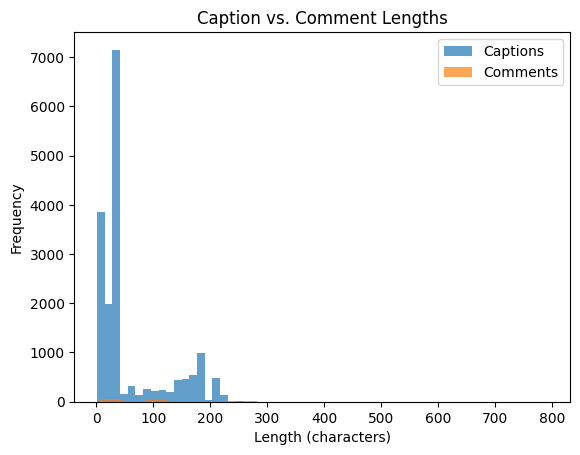

In [5]:
import matplotlib.pyplot as plt

caption_lengths = [len(x) for x in raw_captions]
comment_lengths = [len(x) for x in raw_comments]

plt.hist(caption_lengths, bins=20, alpha=0.7, label='Captions')
plt.hist(comment_lengths, bins=20, alpha=0.7, label='Comments')
plt.legend()
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.title('Caption vs. Comment Lengths')
plt.show()


2. Vocabulary Diversity (Type-Token Ratio)


In [6]:
def type_token_ratio(lines):
    words = [word.lower() for line in lines for word in line.split()]
    unique = set(words)
    return len(unique) / len(words) if words else 0

print("Caption TTR:", type_token_ratio(raw_captions))
print("Comment TTR:", type_token_ratio(raw_comments))


Caption TTR: 0.30845389026250725
Comment TTR: 0.38346077598414047


3. Top-N Word Frequency (After Stopword Removal)


In [7]:
from collections import Counter

stopwords = set(['the', 'and', 'a', 'is', 'in', 'to', 'of', 'that', 'it', 'on', 'for', 'with', 'as', 'this', 'was', 'but', 'are', 'not', 'be', 'at', 'by', 'an', 'if', 'or', 'from', 'so', 'we'])

def top_n_words(lines, n=20):
    words = [word.lower() for line in lines for word in line.split() if word.lower() not in stopwords]
    return Counter(words).most_common(n)

print("Top 20 caption words:", top_n_words(raw_captions))
print("Top 20 comment words:", top_n_words(raw_comments))


Top 20 caption words: [('i', 1015), ('going', 816), ('you', 788), ('okay', 718), ('here', 703), ("i'm", 648), ('all', 614), ('have', 609), ('just', 572), ('right', 554), ('know', 546), ('our', 543), ('data', 540), ('what', 525), ('now', 522), ('one', 471), ('can', 446), ('these', 421), ('do', 400), ('like', 399)]
Top 20 comment words: [('i', 92), ('you', 36), ('learning', 26), ('thank', 26), ('⌨', 25), ('my', 24), ('machine', 23), ('video', 19), ('me', 17), ('she', 17), ('very', 16), ('thanks', 16), ('just', 15), ('great', 15), ('ml', 14), ('have', 14), ('understand', 13), ('really', 13), ('best', 13), ('course', 12)]
